In [ ]:
# Guanxiao Chen
# 1005717841
# INF2178
# Assignment 4

In [ ]:
import pandas as pd

# 2. Data Cleaning
# Load the dataset
from google.colab import drive
drive.mount('/drive', force_remount=True)
df = pd.read_csv('./INF2178_A4_data.csv')

# Display DataFrame's information
print('Data Overview:')
print(df.info())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values:")
print(missing_values)

# Fill missing 'SES' value with mode for categorical data
df['SES'].fillna(df['SES'].mode()[0], inplace=True)

# Fill missing 'MMSE' value with mean for numerical data
df['MMSE'].fillna(df['MMSE'].mean(), inplace=True)

# Dispaly the cleaned DataFrame
print('\nCleaned Data Overview:')
print(df.info())

Mounted at /drive
Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    int64  
 1   Subject ID  294 non-null    object 
 2   MRI ID      294 non-null    object 
 3   Group       294 non-null    object 
 4   Visit       294 non-null    int64  
 5   MR Delay    294 non-null    int64  
 6   M/F         294 non-null    object 
 7   Hand        294 non-null    object 
 8   Age         294 non-null    int64  
 9   EDUC        294 non-null    int64  
 10  SES         279 non-null    float64
 11  MMSE        293 non-null    float64
 12  CDR         294 non-null    float64
 13  eTIV        294 non-null    int64  
 14  nWBV        294 non-null    float64
 15  ASF         294 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 36.9+ KB
None

Missing values:
Unnamed: 0     0
Subject ID     0
MRI I

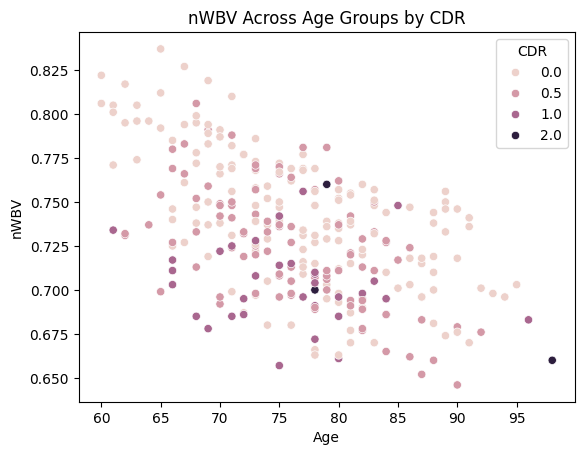

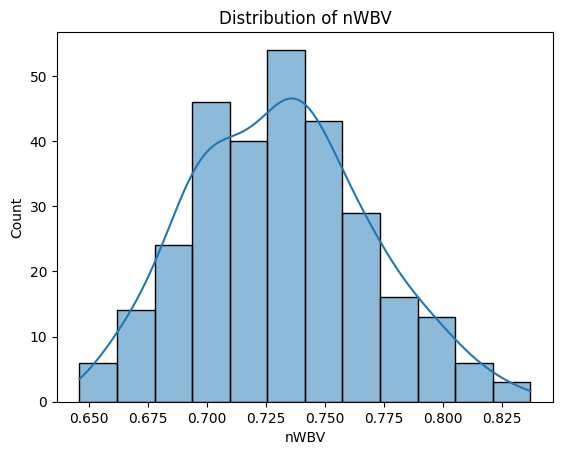

In [ ]:
# 3. The Influence of Clinical Dementia Rating for Brain Volume
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis
# Load the dataset
df = pd.read_csv('./INF2178_A4_data.csv')

# EDA for 'nWBV' across 'Age' and 'CDR'
sns.scatterplot(x='Age', y='nWBV', hue='CDR', data=df)
plt.title('nWBV Across Age Groups by CDR')
plt.show()

# Distribution of nWBV
sns.histplot(df['nWBV'], kde=True)
plt.title('Distribution of nWBV')
plt.show()


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Applying mixed effects ANOVA
model_1 = smf.mixedlm("nWBV ~ C(CDR) * Age", df, groups=df["Subject ID"])
result_1 = model_1.fit()
print(result_1.summary())


            Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   nWBV    
No. Observations:    294       Method:               REML    
No. Groups:          150       Scale:                0.0001  
Min. group size:     1         Log-Likelihood:       711.4381
Max. group size:     2         Converged:            Yes     
Mean group size:     2.0                                     
-------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept          0.977    0.023  41.890 0.000  0.932  1.023
C(CDR)[T.0.5]     -0.029    0.032  -0.922 0.357 -0.091  0.033
C(CDR)[T.1.0]     -0.084    0.045  -1.858 0.063 -0.172  0.005
C(CDR)[T.2.0]     -0.014    0.076  -0.184 0.854 -0.163  0.135
Age               -0.003    0.000 -10.251 0.000 -0.004 -0.003
C(CDR)[T.0.5]:Age  0.000    0.000   0.524 0.600 -0.001  0.001
C(CDR)[T.1.0]:Age  0

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


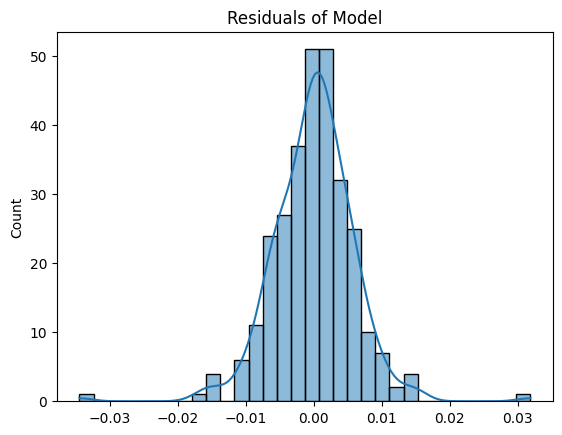

In [ ]:
# Checking Assumptions
residuals = result_1.resid
sns.histplot(residuals, kde=True)
plt.title('Residuals of Model')
plt.show()


Sample size required for the experiment: 45.45073088568012


<Figure size 640x480 with 0 Axes>

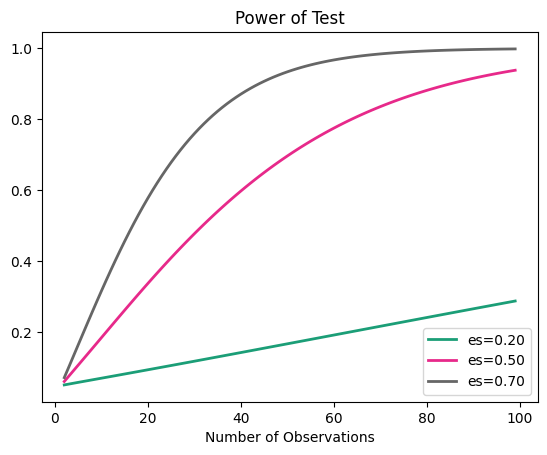

In [ ]:
from statsmodels.stats.power import TTestIndPower
import numpy as np

# Statistical Power Analysis
analysis = TTestIndPower()
effect_size = 0.7  # Effect size given
alpha = 0.05  # Significance level given
power = 0.91  # Desired power given

sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1, alternative='two-sided')
print(f"Sample size required for the experiment: {sample_size}")

# Power plot
fig = plt.figure()
analysis.plot_power(dep_var='nobs', nobs=np.arange(2, 100), effect_size=np.array([0.2, 0.5, 0.7]))
plt.show()


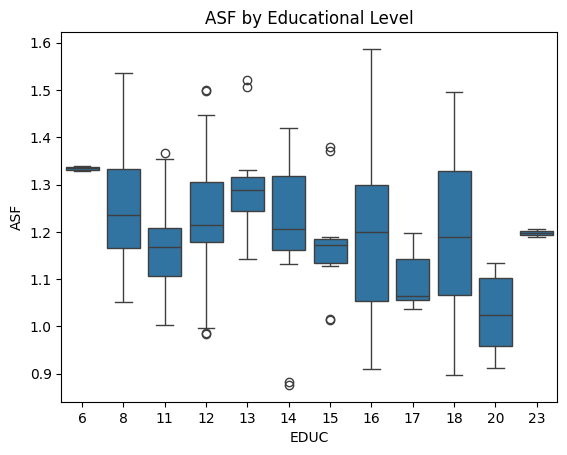

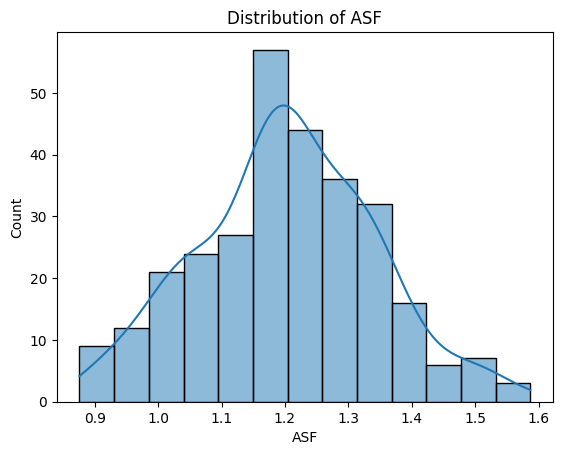

In [76]:
# 4. The Influence of Educational Level for the Progression of Brain Atrophy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('./INF2178_A4_data.csv')

# Exploratory Data Analysis
# EDA: Visualize ASF by EDUC level
sns.boxplot(x='EDUC', y='ASF', data=df)
plt.title('ASF by Educational Level')
plt.show()

# Check the distribution of ASF
sns.histplot(df['ASF'], kde=True)
plt.title('Distribution of ASF')
plt.show()


In [78]:
# Applying mixed effects ANOVA
import statsmodels.formula.api as smf

# Model 1: Simple model with EDUC as a fixed effect
model_1 = smf.mixedlm("ASF ~ EDUC", df, groups=df["Subject ID"])
result_1 = model_1.fit()
print(result_1.summary())

# Model 2: More complex model with EDUC and CDR
model_2 = smf.mixedlm("ASF ~ EDUC + CDR", df, groups=df["Subject ID"])
result_2 = model_2.fit()
print(result_2.summary())


        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: ASF     
No. Observations: 294     Method:             REML    
No. Groups:       150     Scale:              0.0004  
Min. group size:  1       Log-Likelihood:     392.2815
Max. group size:  2       Converged:          Yes     
Mean group size:  2.0                                 
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept    1.352    0.057 23.604 0.000  1.239  1.464
EDUC        -0.010    0.004 -2.642 0.008 -0.018 -0.003
Group Var    0.018    0.156                           

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: ASF     
No. Observations: 294     Method:             REML    
No. Groups:       150     Scale:              0.0004  
Min. group size:  1       Log-Likelihood:     389.7219
Max. group size:  2       C

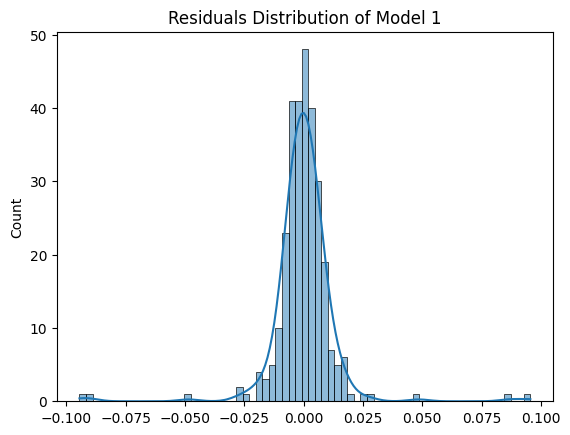

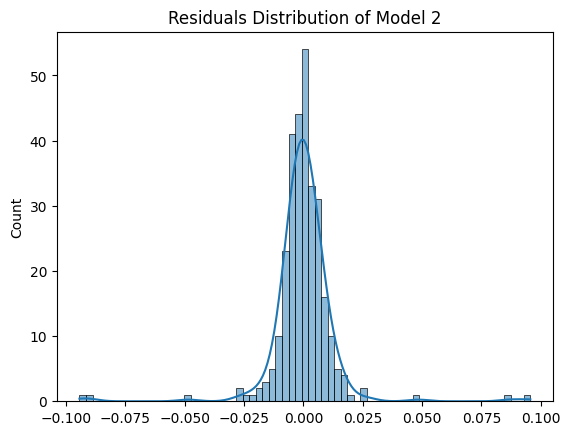

In [79]:
# Checking Assumptions
residuals_1 = result_1.resid
sns.histplot(residuals_1, kde=True)
plt.title('Residuals Distribution of Model 1')
plt.show()

residuals_2 = result_2.resid
sns.histplot(residuals_2, kde=True)
plt.title('Residuals Distribution of Model 2')
plt.show()


Sample size required for the experiment: 45.45073088568012


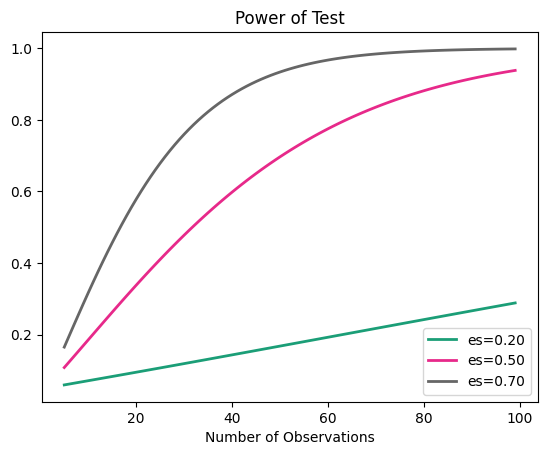

In [81]:
from statsmodels.stats.power import TTestIndPower

# Statistical Power Analysis
power_analysis = TTestIndPower()
effect_size = 0.7  # Effect size given
alpha = 0.05  # Significance level given
power = 0.91  # Desired power given

sample_size = power_analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1)
print(f"Sample size required for the experiment: {sample_size}")

# Power plot
effect_sizes = np.array([0.2, 0.5, 0.7])
sample_sizes = np.arange(5, 100)
power_analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.title('Power of Test')
plt.show()